## Objective

This notebook demonstrates the construction of a proxy credit risk target using RFM analysis and K-Means clustering.

Load data & functions

In [5]:
# install project in editable mode (enables importing local 'src' package)
%pip install -e ..

from pathlib import Path
import sys

# add project root (parent of notebooks/) to sys.path so 'src' can be imported
sys.path.insert(0, str(Path.cwd().parent.resolve()))

import pandas as pd
from src.target_engineering import calculate_rfm, assign_risk_label
df = pd.read_csv("../data/raw/data.csv")


ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: c:\Users\Kal\OneDrive\Desktop\KIAM\week_4\credit-risk-model
You should consider upgrading via the 'c:\Users\Kal\OneDrive\Desktop\KIAM\week_4\credit-risk-model\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


Compute RFM

In [6]:
rfm = calculate_rfm(df)
rfm.head()


,CustomerId,recency,frequency,monetary
0,CustomerId_1,84,1,-10000.0
1,CustomerId_10,84,1,-10000.0
2,CustomerId_1001,90,5,20000.0
3,CustomerId_1002,26,11,4225.0
4,CustomerId_1003,12,6,20000.0


RFM Distributions (VISUAL EVIDENCE)

array([[<Axes: title={'center': 'recency'}>,
        <Axes: title={'center': 'frequency'}>],
       [<Axes: title={'center': 'monetary'}>, <Axes: >]], dtype=object)

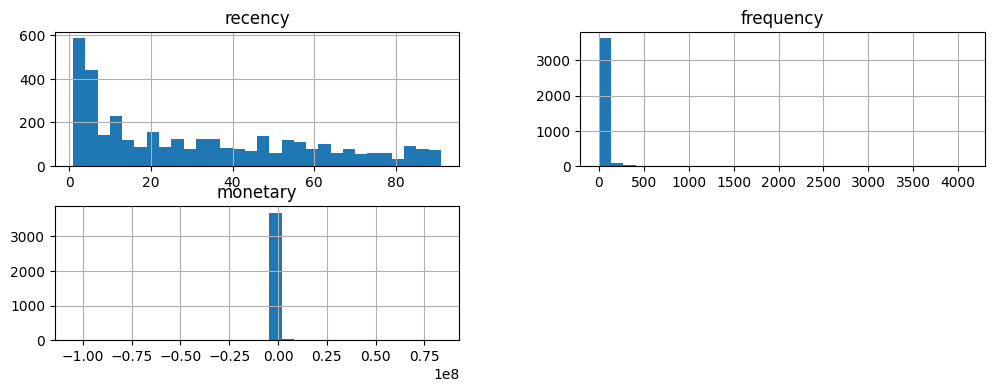

In [7]:
rfm[["recency", "frequency", "monetary"]].hist(bins=30, figsize=(12, 4))


Clustering

In [8]:
rfm_labeled = assign_risk_label(rfm)
rfm_labeled["cluster"].value_counts()


cluster
1    2315
0    1426
2       1
Name: count, dtype: int64

Cluster Interpretation Table (CRITICAL)

In [9]:
rfm_labeled.groupby("cluster")[["recency", "frequency", "monetary"]].mean()


,recency,frequency,monetary
cluster,,,
0,61.877279,7.720196,8.172068e+04
1,12.726566,34.800000,2.725741e+05
2,29.000000,4091.000000,-1.049000e+08


Target Distribution

In [10]:
rfm_labeled["is_high_risk"].value_counts(normalize=True)


is_high_risk
0    0.61892
1    0.38108
Name: proportion, dtype: float64

Save target

In [11]:
rfm_labeled.to_csv("../data/processed/rfm_with_target.csv", index=False)
